# Convolutional Neural Network.
## Instructions and Requirements:
This week workshop will have two sections:

*   Section: 1
  *   In this section, we will implement and observe the operations of various layers used to build the CNN.
  *   By the end of the workshop, we expect you to be able to:
      1.   Explain the Convolution operation
      2.   Explain the pooling operation
      3.   Get familiar with various hyperparameters i.e. stride, padding

*   Section: 2
  *   In this section we will compile all the learning from section 1 to build a basic Convolutional Neural Network using Keras and Tensorflow.
  

##Convolution Summary:

We convolve (slide) a small matrix also known as Filter/kernel, performing element wise matrix multiplications to produce filter-map.

  *   Objective of a convolution operations:
        1.   Apply a set of weights-a filter- to extract local features.
        2.   Use Multiple filters to extract different features.
        3.   Spatially share parameters of each filter.

Mathematically it perform following:
$$ conv(I,K)_{xy} = ∑_{i=1}^{h}\sum_{j=1}^{w}K_{ij}.I_{x+i-1,y+j-1} \tag{1} $$

Where:
- $I$ input image matrix..
-$K$ kernel/Filter used to perform convolution.

Hyper-parameters in Convolution Operations:
*   Number of Filters(K)
*   Size of Filters(F)
*   Stride(S)
*   amount of zero padding(P)

Output Dimensions is given by:

\begin{align}
\mathbf{O}  = \frac{W_{in} -f + 2p}{s} + 1 \tag{2}
\end{align}

### Exercise-1.

Perform following Convolution Operations:

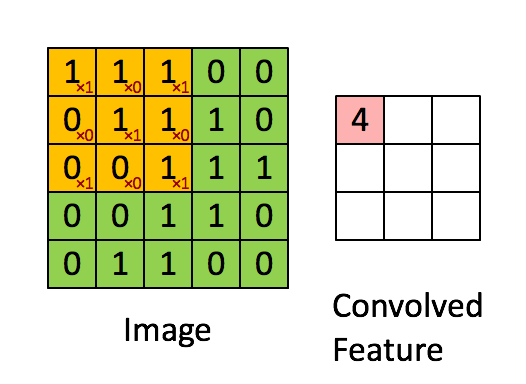

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
# Defining the input matrix as above using np.array function.
I = np.array([[1, 1, 1, 0, 0], [0, 1, 1, 1 ,0], [0, 0, 1, 1, 1,], [0, 0, 1, 1, 0], [0, 1, 1, 0, 0]])

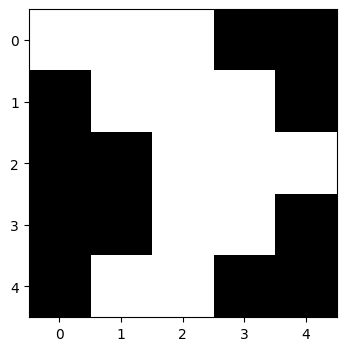

In [3]:
# Visualizing the input.
plt.imshow(I)

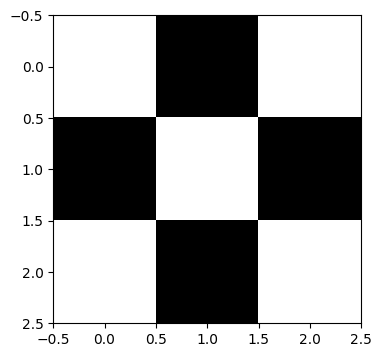

In [4]:
# Defining the input matrix as above using np.matrix function.
K = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
# Visualizing the Filter.
plt.imshow(K)


In [25]:
def convolution(img, filter):
  """
  Function performs convolution operations.
  Arguments:
  Inputs Arguments:
  img(nd array): numpy array of an input image.
  filter(nd array): numpy array of an input filter.
  Output Argumets:
  Filter_Map of Dimesions specified by eq(2).
  """
  img_height, img_width = img.shape
  filter_height, filter_width = filter.shape

  output_dimension = img_height-filter_height + 1
  filter_map = np.zeros(shape=(output_dimension, output_dimension))
  # Write a code for Convolution operation between input matrix img and Filter matrix filter
  for i in range(output_dimension):
    for j in range(output_dimension):
      region = img[i:i+filter_height, j:j+filter_width]
      filter_map[i, j] = np.sum(region * filter)
  return filter_map


In [26]:
img = convolution(I, K)

In [27]:
assert img.shape == (3, 3), " Convolution Operation did not produce correct output"

Test Passed


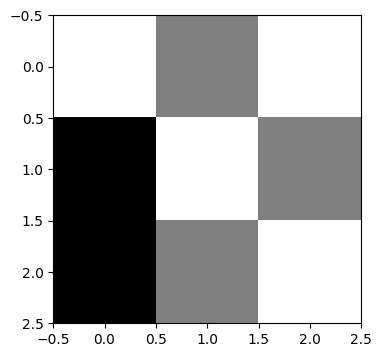

In [28]:
plt.imshow(img)
print("Test Passed")

# Section-2: In this section we will build very basic CNN architecture, Compile and train our CNN model.

This will be further divided into following sections:


## Section-2.1: Data Pre-processing.

Expected structure of folder:

-/Datasets/

      --train/
        -- acai/....     
        -- cupuacu/---
        -- all the classes--

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
data_dir = "/content/drive/MyDrive/AI&ML/FruitinAmazon/train"

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [34]:
# Hyper-parameters:
batch_size = 32
img_height = 180
img_width = 180

### Load the Data:

We will use tf.keras.utility to load the image, for this function to work, your data should be in the structure suggested above.

We will do this for both training and validation dataset.

### Exercise:

1. To train a deep learning model we need to create a data pipeline, Multiple different approaches are available within keras framework;
one such framework is
  "tf.keras.utils.image_dataset_from_directory("parameter")

Implement above framework and explain the parameters you have used in the comment.

In [53]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/AI&ML/FruitinAmazon/train",
    image_size=(128, 128),
    batch_size=32,
    validation_split=0.2,  # Slipt 20% of training data for validation
    subset="training",
    seed=123
  )

Found 90 files belonging to 6 classes.
Using 72 files for training.


In [41]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/AI&ML/FruitinAmazon/train",
    image_size=(128, 128),
    batch_size=32,
    validation_split=0.2,
    subset="validation",
    seed=123
  )

Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [42]:
# Printing out number of Classes
class_names = train_ds.class_names
print(class_names)

['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


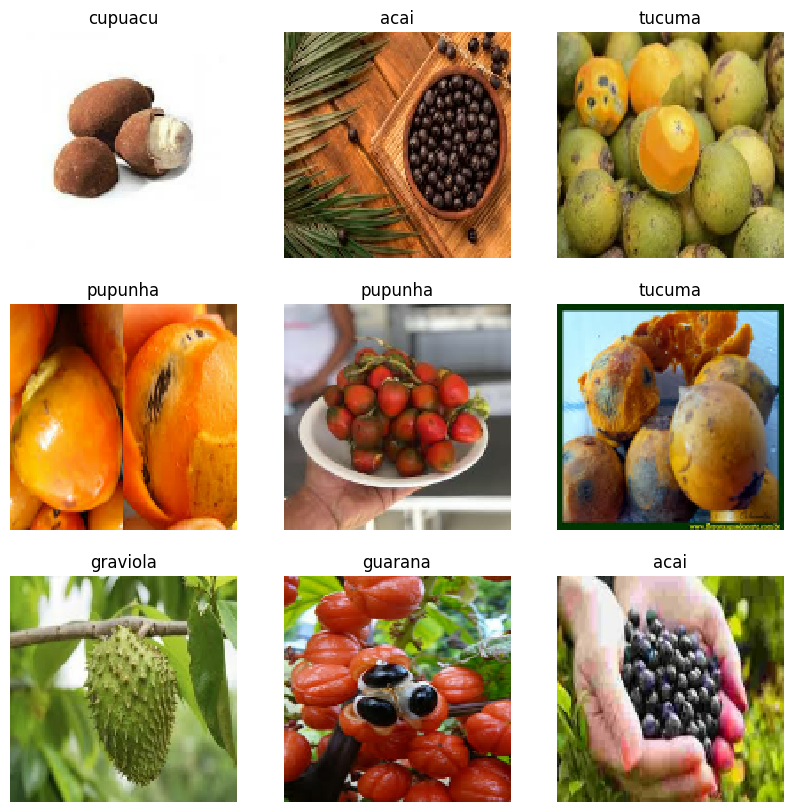

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [44]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


## Design CNN Architecture:

For this task, we will build a CNN with following layers:

Feature-Extraction and Convolution Operations.
1.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
2.   Pooling layer[max, F=(2,2), S=2].
3.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
4.   Pooling layer[max, F=(2,2), S=2].

Classification-Assigning a class probabilities to each classes.
1.   Flatten Layer()
2.   Hidden/Dense Layer [number of neurons=128].
3.   Output Layer [number of neurons=num_classes].


### Exercise:

Please fill the hyper-parameters as defined above in the below layers.

In [59]:
def generate_model(image_height, image_width, nchannels, num_classes):
  """
  This function will generate a model with set of hyperparameters defined above.
  Input Args:
  image_height[int] = Height of an image.
  image_width[int] = Width of an image.
  nchannels[int] = Number of channels in image.
  num_classes[int] = Number of classes in dataset.
  Output Args:
  model-> A CNN model.
  """
  model = tf.keras.Sequential([
      # Rescaling and input layer, [For keras the input shape must be(image height, image width, channels)]
      layers.Input(shape=(image_height,image_width,nchannels)),
      layers.Rescaling(1./255),
      # First Block of Convolution and Pooling Operations.
      layers.Conv2D(32, (3,3), activation='relu'),
      layers.MaxPooling2D(),
      # Second Block of Convolution and Pooling Operations.
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D(),
      # Fully connected classifier.
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(num_classes, activation='softmax')
  ])
  return model

img_height = 180
img_width = 180

In [60]:
num_classes = len(class_names)
model = generate_model(img_height, img_width, 3, num_classes)

In [61]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 118336)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      15,147,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,167,302 (57.86 MB)

 Trainable params: 15,167,302 (57.86 MB)

 Non-trainable params: 0 (0.00 B)

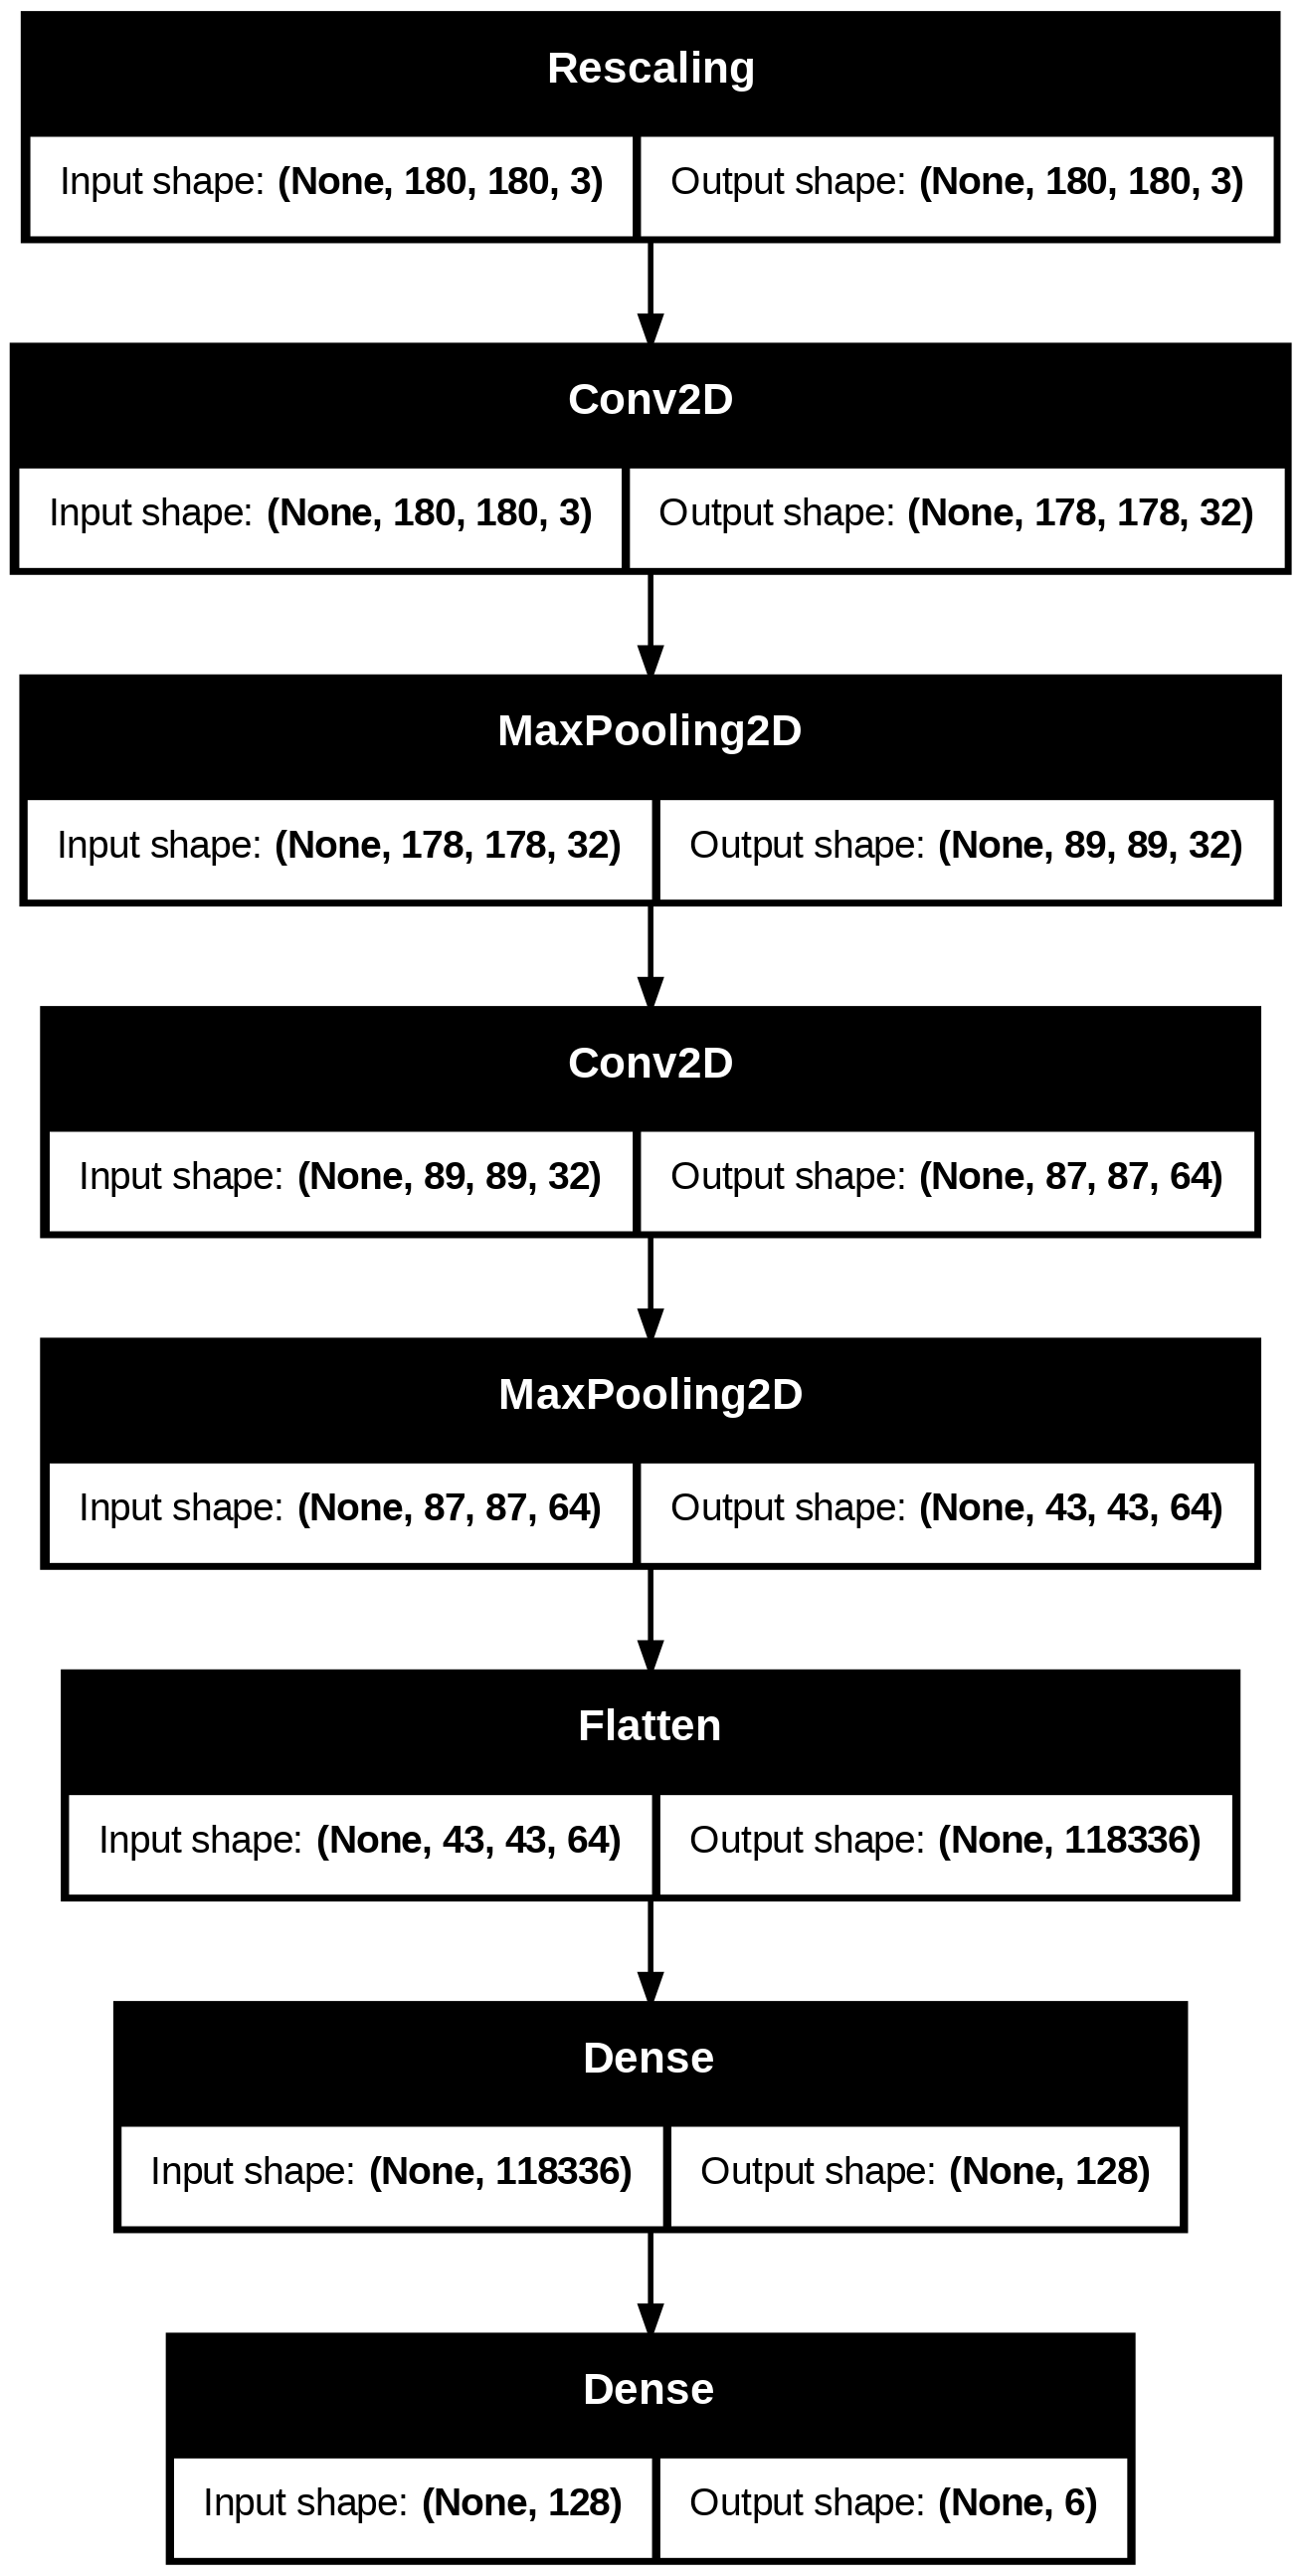

In [48]:
keras.utils.plot_model(model, show_shapes=True)

## Compile and Train Model.

Once we built the model, we need to compile the model before we start training.

In Model compilation, we do the following:
*   Checks for format Error.
*   Defines the loss function.
*   Defines the optimizer.
*   Defines the learning rate.
*   Defines the metrics we will be using.

For training our model we will be using:
*   loss --> SparseCategoricalCrossEntropy.
*   Optimizer --> Adam.
*   Evaluation Metric --> Accuracy.


In [78]:
model = generate_model(128, 128, 3, num_classes)
model.compile( optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


### Train the Model.

For training a model with all the given hyper-parameters, and argumets we invoke fit methods.

It is a standard practise to return and hold record of losses values and metric values during training in variablel-history.

In [79]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 954ms/step - accuracy: 0.1545 - loss: 3.4334 - val_accuracy: 0.1667 - val_loss: 3.0248
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 646ms/step - accuracy: 0.2964 - loss: 2.3027 - val_accuracy: 0.2222 - val_loss: 1.8055
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 607ms/step - accuracy: 0.3260 - loss: 1.5661 - val_accuracy: 0.2222 - val_loss: 1.7190
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 539ms/step - accuracy: 0.6037 - loss: 1.1746 - val_accuracy: 0.5000 - val_loss: 1.4871
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 700ms/step - accuracy: 0.8160 - loss: 0.8466 - val_accuracy: 0.4444 - val_loss: 1.4377
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 875ms/step - accuracy: 0.9015 - loss: 0.5360 - val_accuracy: 0.2778 - val_loss: 1.7722
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 609ms/step - accuracy: 0.9162 - loss: 0.3923 - val_accuracy: 0.4444 - val_loss: 1.7112
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 607ms/step - accuracy: 0.9744 - loss: 0.2189 - val_accuracy: 0.5000 - val_loss:

## Observe the Model Performance.


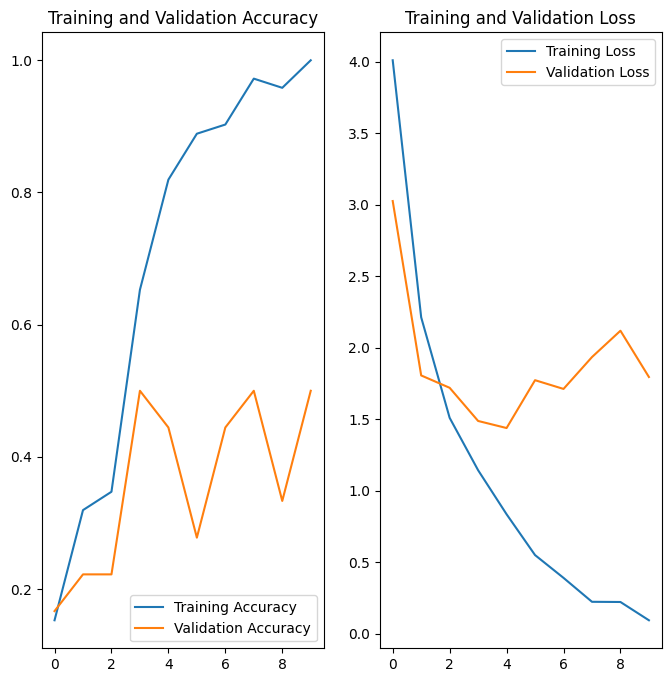

In [80]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Home Task:

Create a Test Set and Perform a model evaluation to find the test accuracy.

Based on last week built a function which predicts input examples, and also plot the result.


In [87]:
# Evaluating the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Prediction function for a single input
def predict_example(model, x_input):
    x_input = np.expand_dims(x_input, axis=0)  # Adding batch dimension
    prediction = model.predict(x_input)
    return np.argmax(prediction, axis=1)

# Plot the predictions
import matplotlib.pyplot as plt
def plot_predictions(model, x_test, y_test, num_samples=5):
    plt.figure(figsize=(10, 10))

    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(x_test[i])  # Show the test image
        true_label = y_test[i]
        predicted_label = predict_example(model, x_test[i])

        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis('off')

    plt.show()

plot_predictions(model, x_test, y_test, num_samples=5)


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 28, 28), dtype=float32). Expected shape (None, 128, 128, 3), but input has incompatible shape (None, 28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 28, 28), dtype=float32)
  • training=False
  • mask=None